In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")

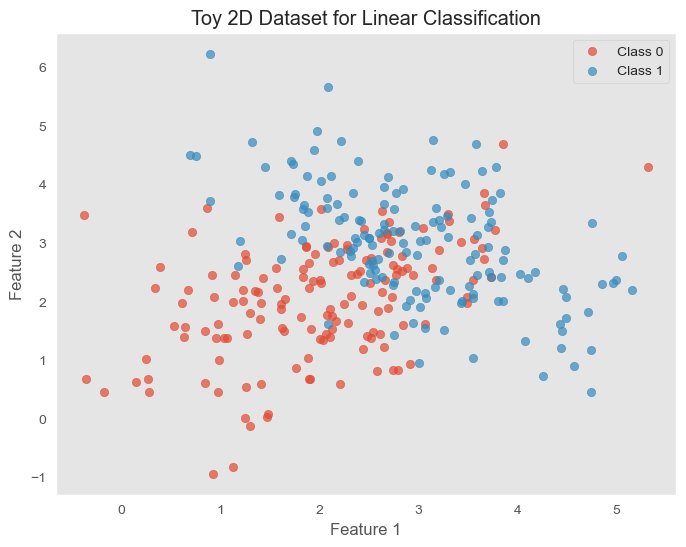

In [23]:
# Generate a toy 2D dataset
def generate_toy_dataset(n_samples=300, random_seed=42):
    np.random.seed(random_seed)

    # Class 1
    x1 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], n_samples // 2)
    y1 = np.zeros(n_samples // 2)

    # Class 2
    x2 = np.random.multivariate_normal([3, 3], [[1, -0.5], [-0.5, 1]], n_samples // 2)
    y2 = np.ones(n_samples // 2)

    # Combine the data
    X = np.vstack((x1, x2))
    y = np.hstack((y1, y2))

    return X, y

X, y = generate_toy_dataset()

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Toy 2D Dataset for Linear Classification")
plt.legend()
plt.grid()
plt.show()

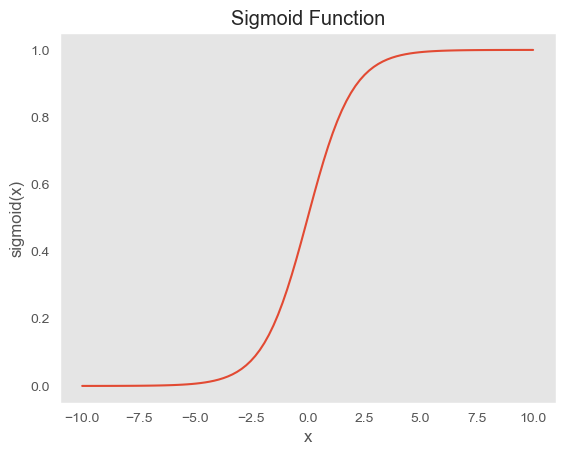

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.figure()
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid()
plt.show()

[-0.03330725  0.86923779  0.85598231]


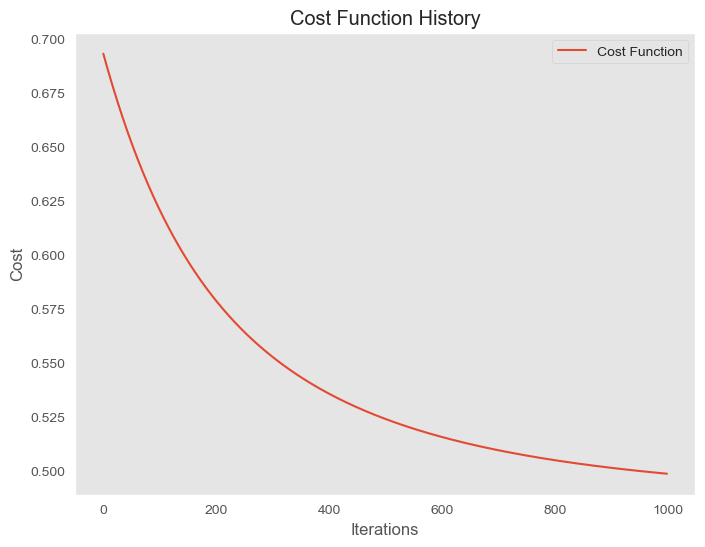

In [25]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    grad = (1 / m) * (X.T @ (h - y))  # Corrected gradient calculation
    return cost, grad
# Gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        J_history[i], grad = cost_function(theta, X, y)
        theta -= alpha* grad

    return theta, J_history

# Feature scaling function
def feature_scaling(X):
    X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X_scaled
# Add intercept term to the feature matrix
def add_intercept(X):
    m = X.shape[0]
    return np.hstack((np.ones((m, 1)), X))
# Logistic regression function
def logistic_regression(X, y, alpha=0.01, num_iters=1000):
    # Feature scaling
    X_scaled = feature_scaling(X)

    # Add intercept term
    X_scaled = add_intercept(X_scaled)

    # Initialize parameters
    m, n = X_scaled.shape
    theta = np.zeros(n)

    # Gradient descent
    theta, J_history = gradient_descent(X_scaled, y, theta, alpha, num_iters)

    return theta, J_history

# Train logistic regression model
theta, J_history = logistic_regression(X, y, alpha=0.01, num_iters=1000)
print(theta)
# Plot the cost function history
plt.figure(figsize=(8, 6))
plt.plot(J_history, label="Cost Function")
plt.title("Cost Function History")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()

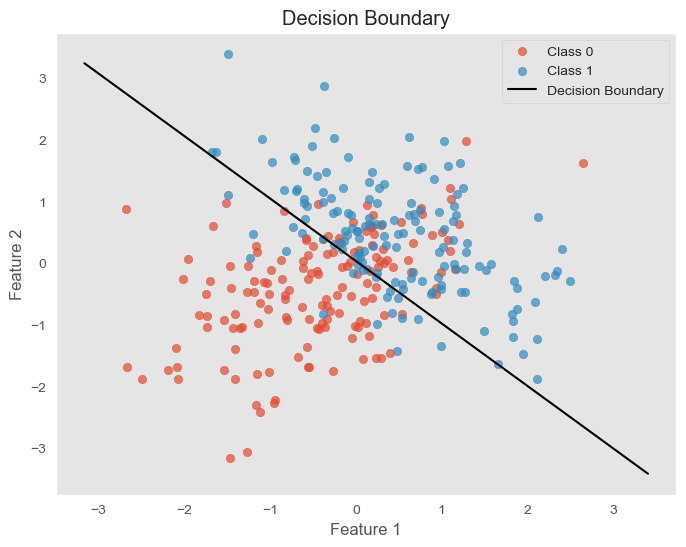

In [26]:
# Decision boundary function
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.7)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.7)

    x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
    y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

    plt.plot(x_boundary, y_boundary, color='black', label="Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.legend()
    plt.grid()
    plt.show()
# Plot decision boundary
plot_decision_boundary(feature_scaling(X), y, theta)

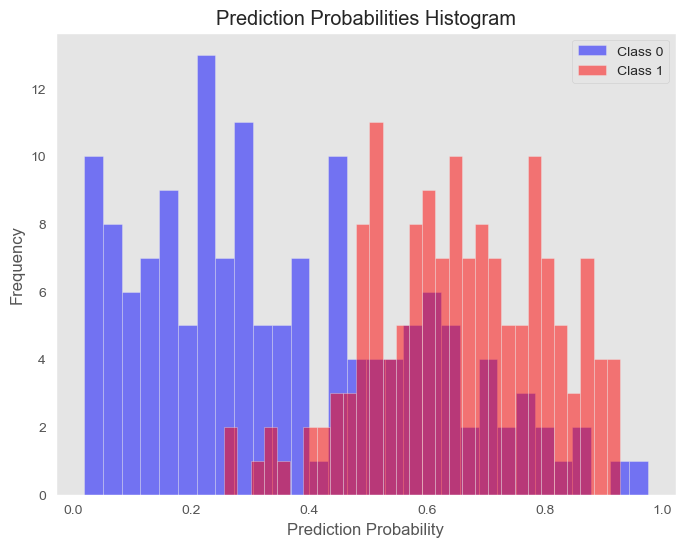

In [27]:
# prediction probabilities histogram
def plot_prediction_probabilities(X, y, theta):
    plt.figure(figsize=(8, 6))
    X_scaled = feature_scaling(X)
    X_scaled = add_intercept(X_scaled)
    probs = sigmoid(X_scaled @ theta)

    plt.hist(probs[y == 0], bins=30, alpha=0.5, label="Class 0", color='blue')
    plt.hist(probs[y == 1], bins=30, alpha=0.5, label="Class 1", color='red')
    plt.xlabel("Prediction Probability")
    plt.ylabel("Frequency")
    plt.title("Prediction Probabilities Histogram")
    plt.legend()
    plt.grid()
    plt.show()

# Plot prediction probabilities histogram
plot_prediction_probabilities(X, y, theta)


[-0.3683504   0.17798952  0.16926722]


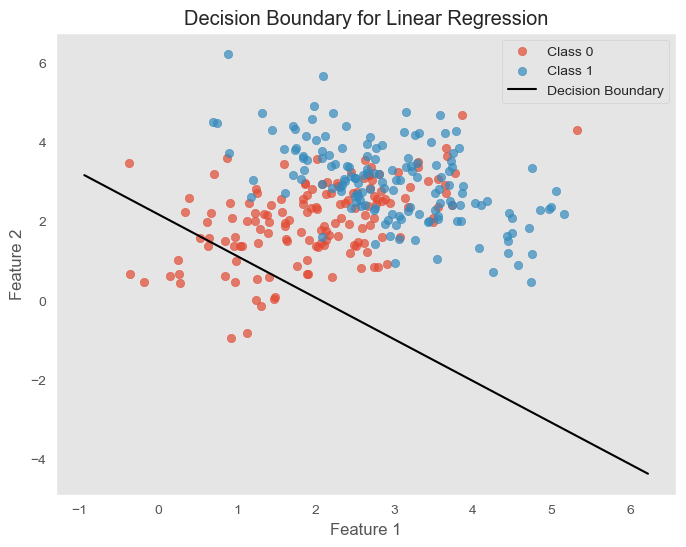

In [31]:
# linear regression
theta = np.linalg.lstsq(add_intercept(X), y)[0]
print(theta)
# Plot decision boundary for linear regression
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.7)

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

plt.plot(x_boundary, y_boundary, color='black', label="Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary for Linear Regression")
plt.legend()
plt.grid()
plt.show()